##Practise GLM Fitting notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#df_freq=pd.read_csv('freMTPL2freq.csv')
#df_freq.columns=df_freq.columns.str.lower()


#df_sev=pd.read_csv('freMTPL2sev.csv')
#df_sev.columns=df_sev.columns.str.lower()


#sev file is simply amounts, join onto frequency file
#df_freq=df_freq.merge(df_sev)

In [3]:
df_freq=pd.read_csv('datacar.csv')
df_freq.drop('Unnamed: 0',axis=1,inplace=True)


## Basic EDA

In [4]:
df_freq.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,01101 0 0 0
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,01101 0 0 0
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,01101 0 0 0
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,01101 0 0 0
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,01101 0 0 0


In [5]:
#add frequency column and then plot frequency by target
#df_freq['frequency']=df_freq['claimnb']/df_freq['exposure']
df_freq['frequency']=df_freq['numclaims']/df_freq['exposure']


In [6]:
def get_numeric_and_categorical_columns(df):
    numeric=[]
    categorical=[]
    for col,type in zip(df.columns,df.dtypes):
        if type==('int64') or type==('float64'):
            numeric.append(col)
        else:
            categorical.append(col)

    return numeric,categorical

numeric,categorical= get_numeric_and_categorical_columns(df_freq)

array([[<Axes: title={'center': 'veh_value'}>,
        <Axes: title={'center': 'exposure'}>,
        <Axes: title={'center': 'clm'}>],
       [<Axes: title={'center': 'numclaims'}>,
        <Axes: title={'center': 'claimcst0'}>,
        <Axes: title={'center': 'veh_age'}>],
       [<Axes: title={'center': 'agecat'}>,
        <Axes: title={'center': 'frequency'}>, <Axes: >]], dtype=object)

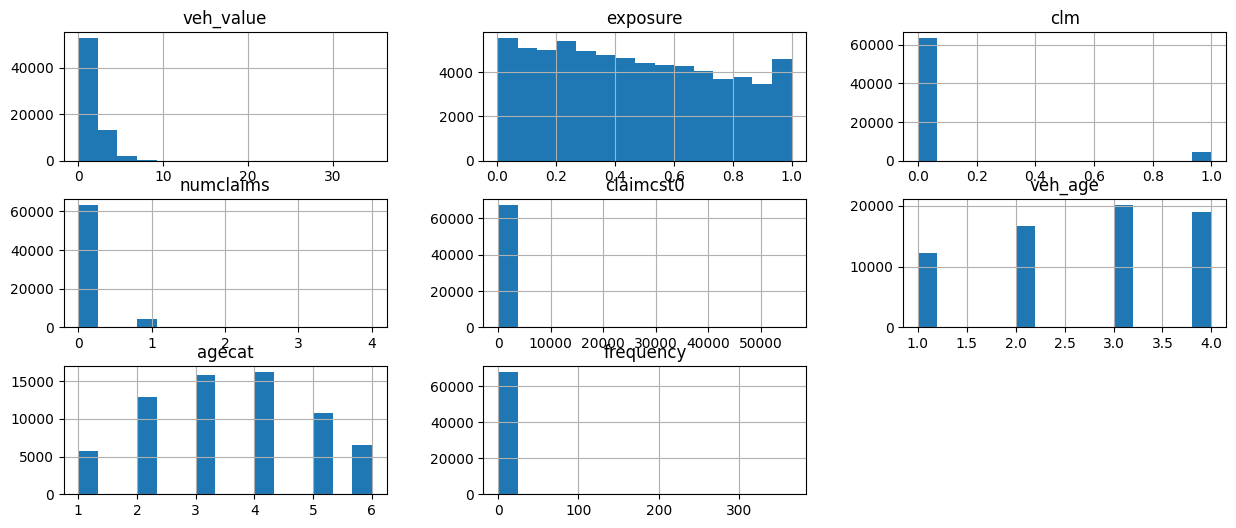

In [7]:
df_freq[numeric].hist(bins=15,figsize=(15,6))

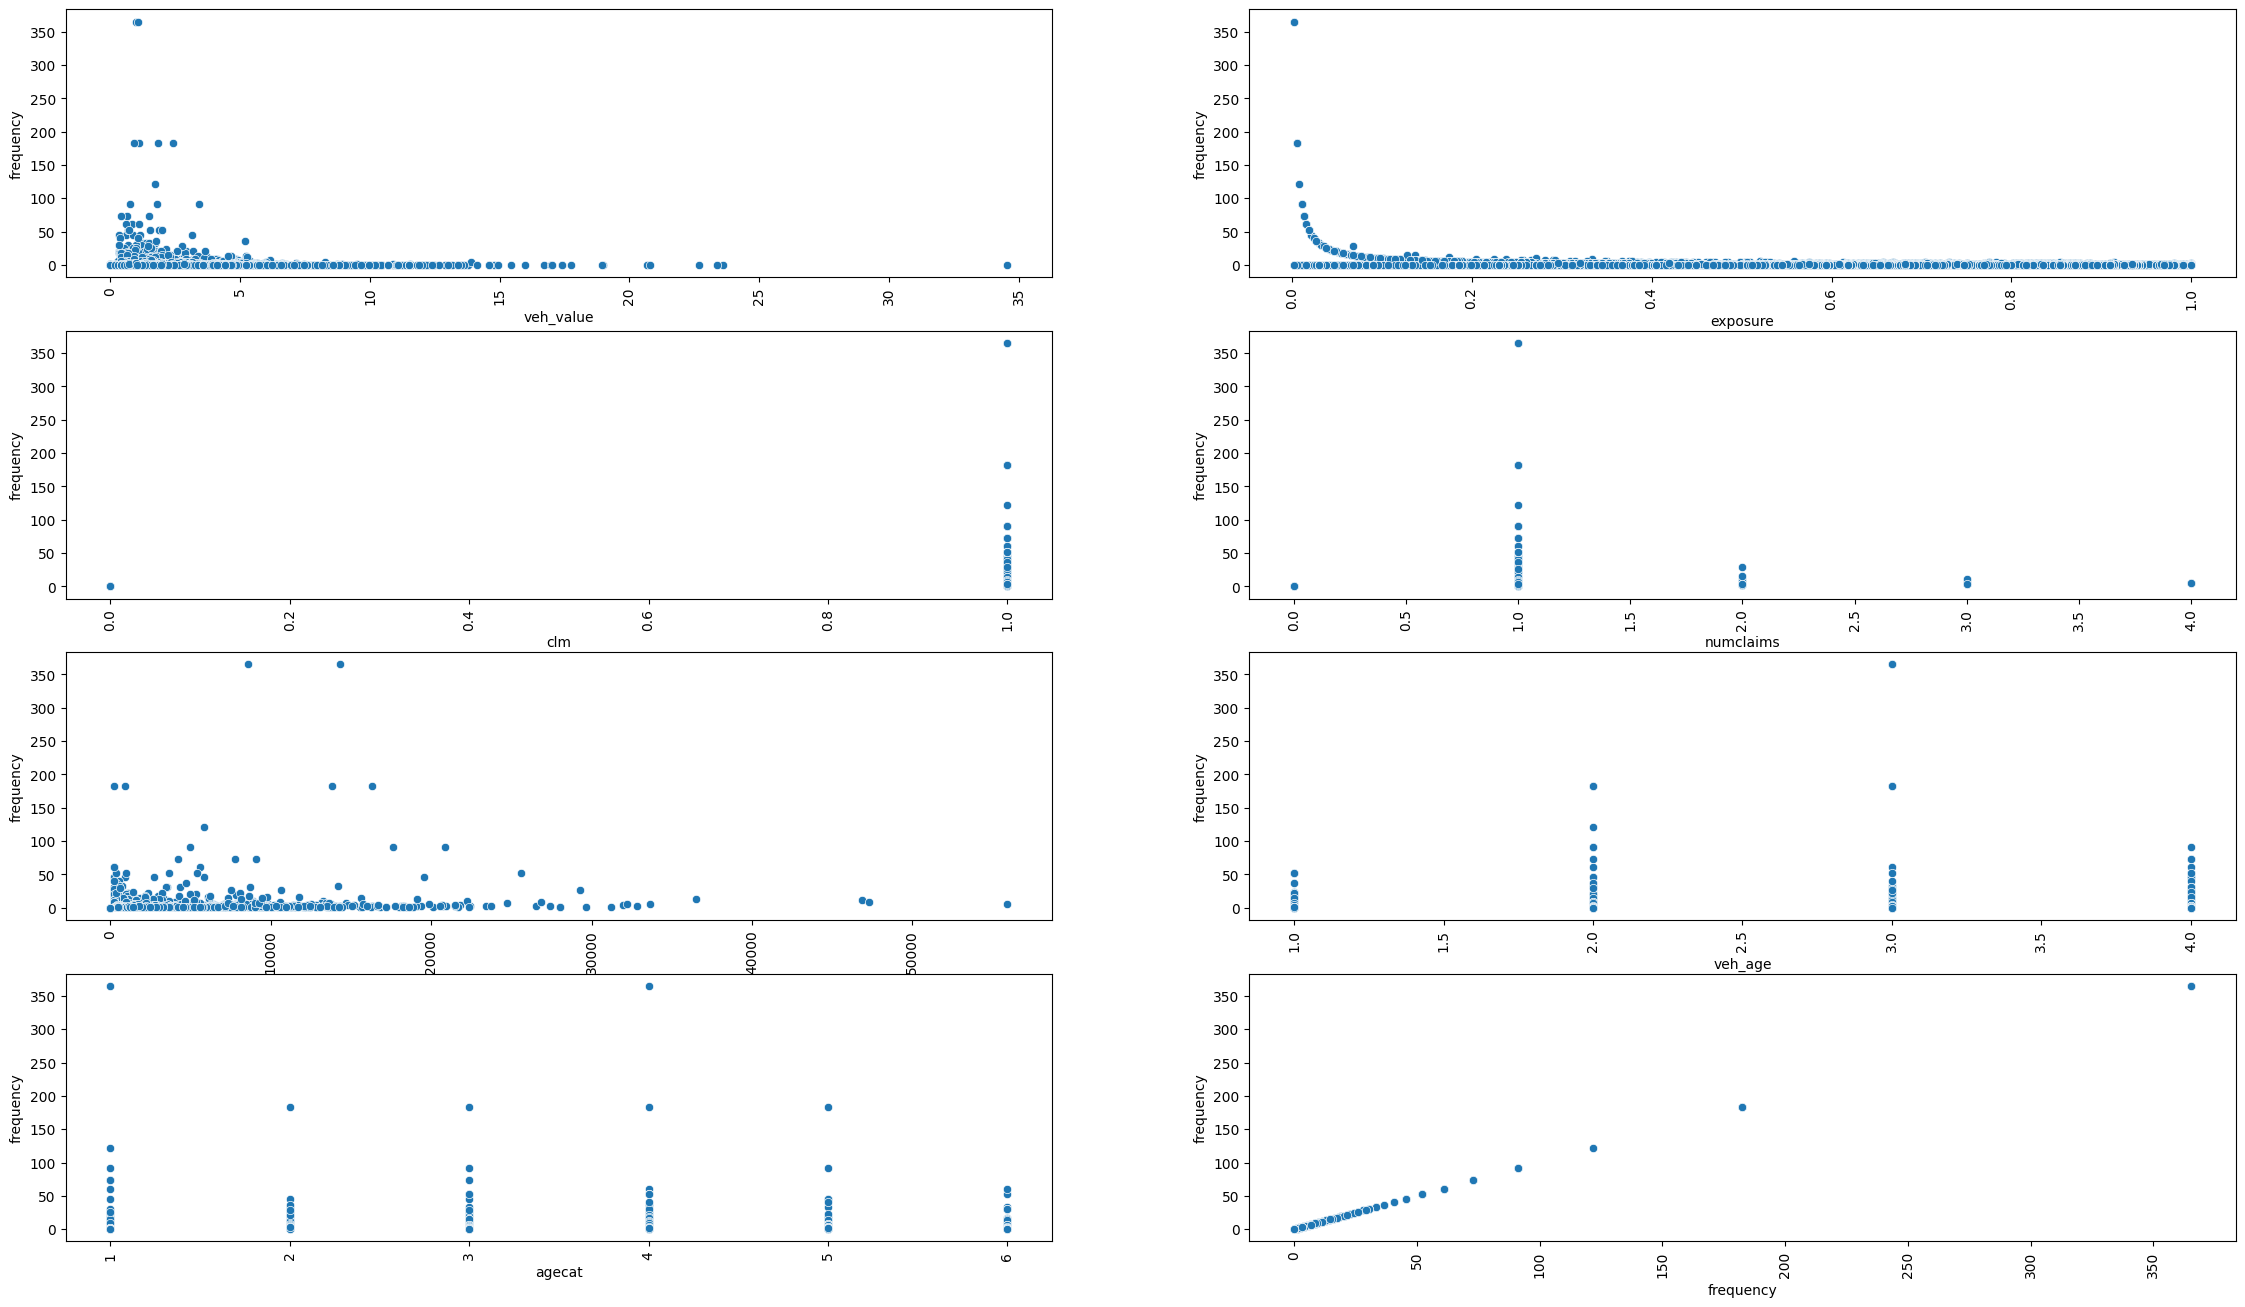

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(28, 16))
for variable, subplot in zip(numeric, ax.flatten()):
    sns.scatterplot(x=df_freq[variable],y=df_freq['frequency'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

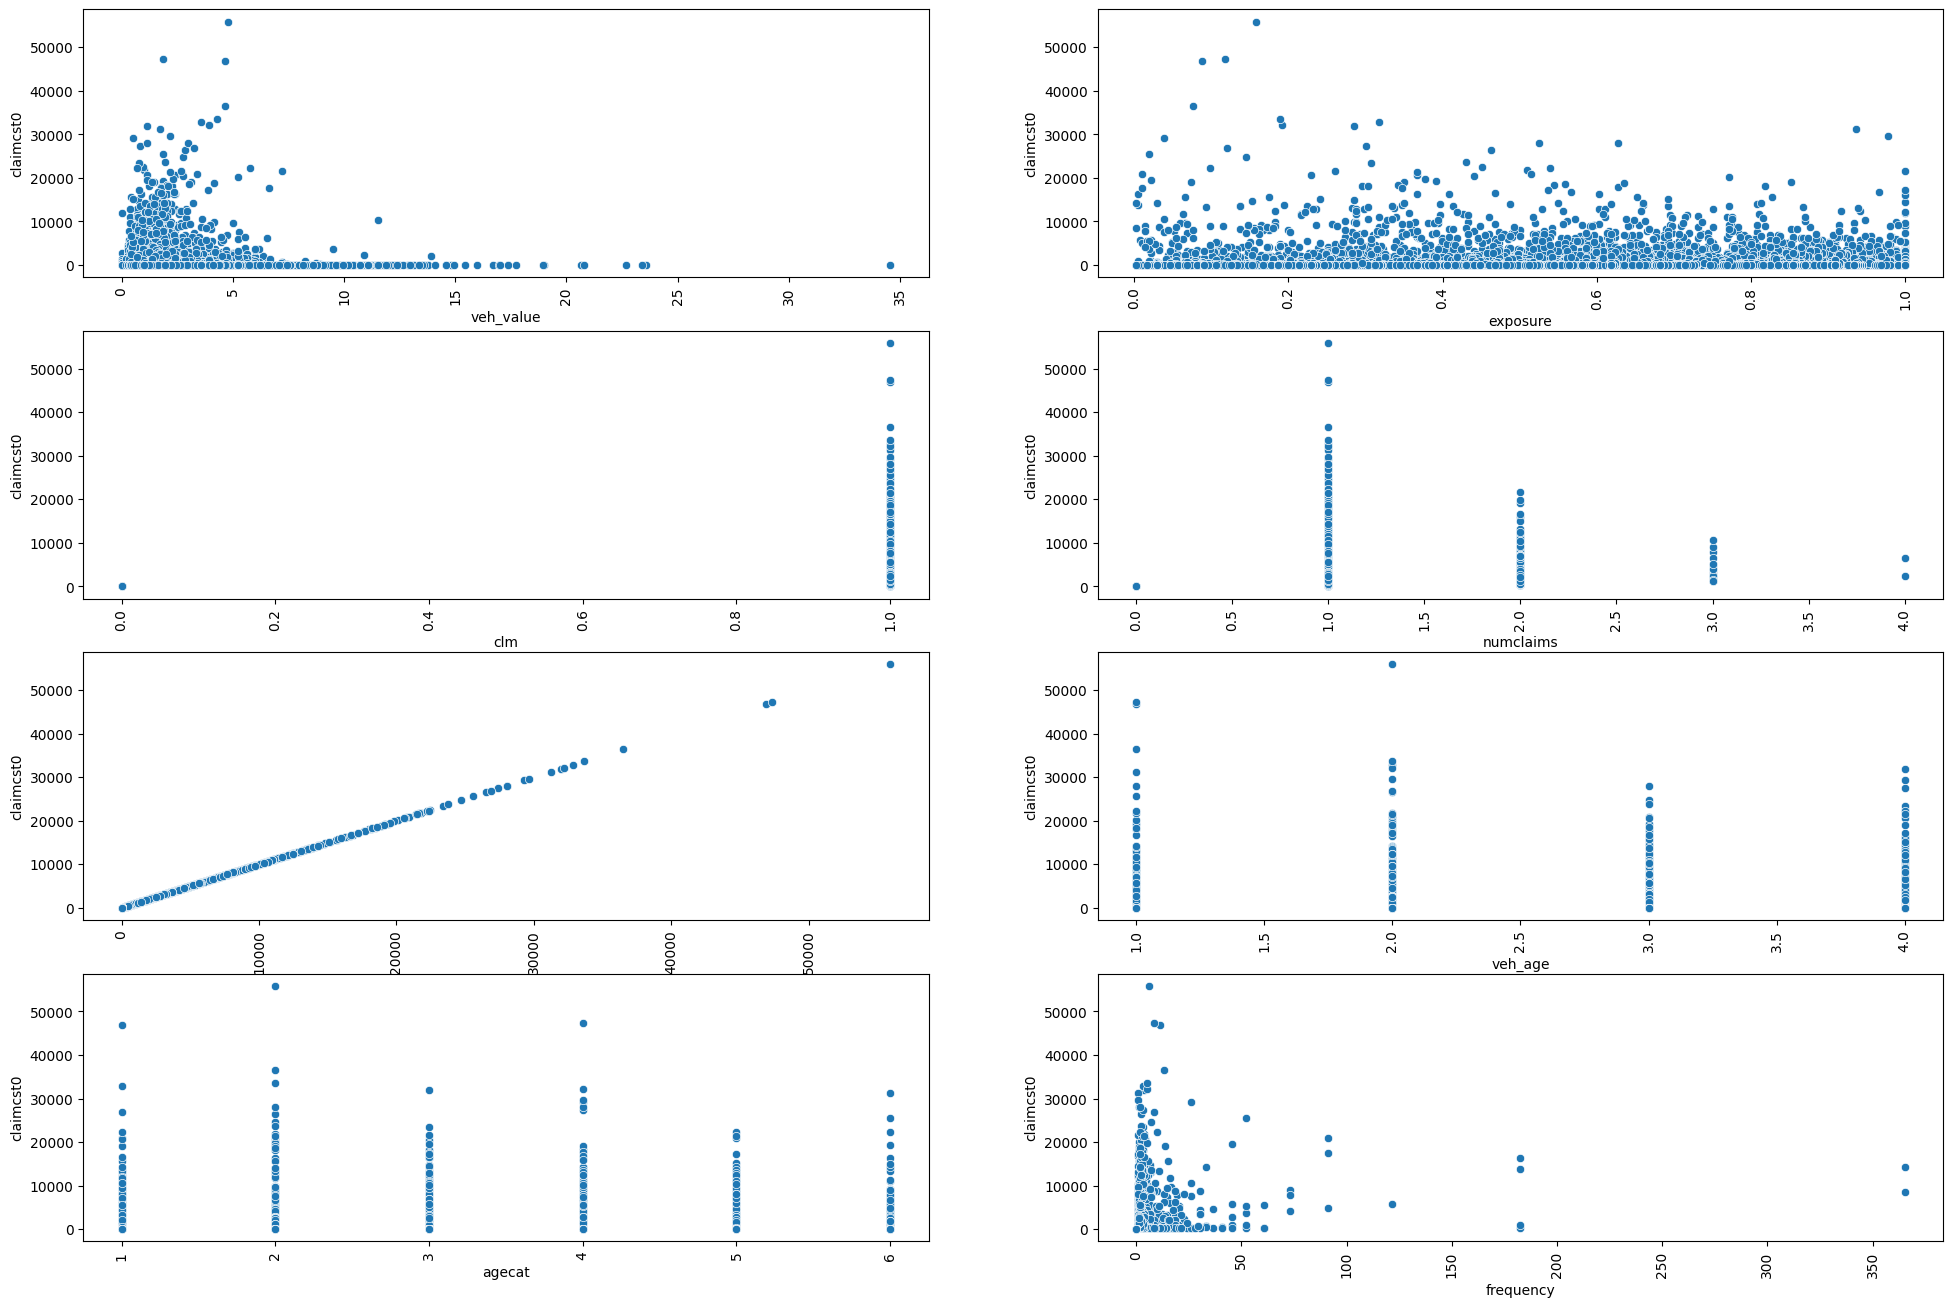

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(24, 16))
for variable, subplot in zip(numeric, ax.flatten()):
    sns.scatterplot(x=df_freq[variable],y=df_freq['claimcst0'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

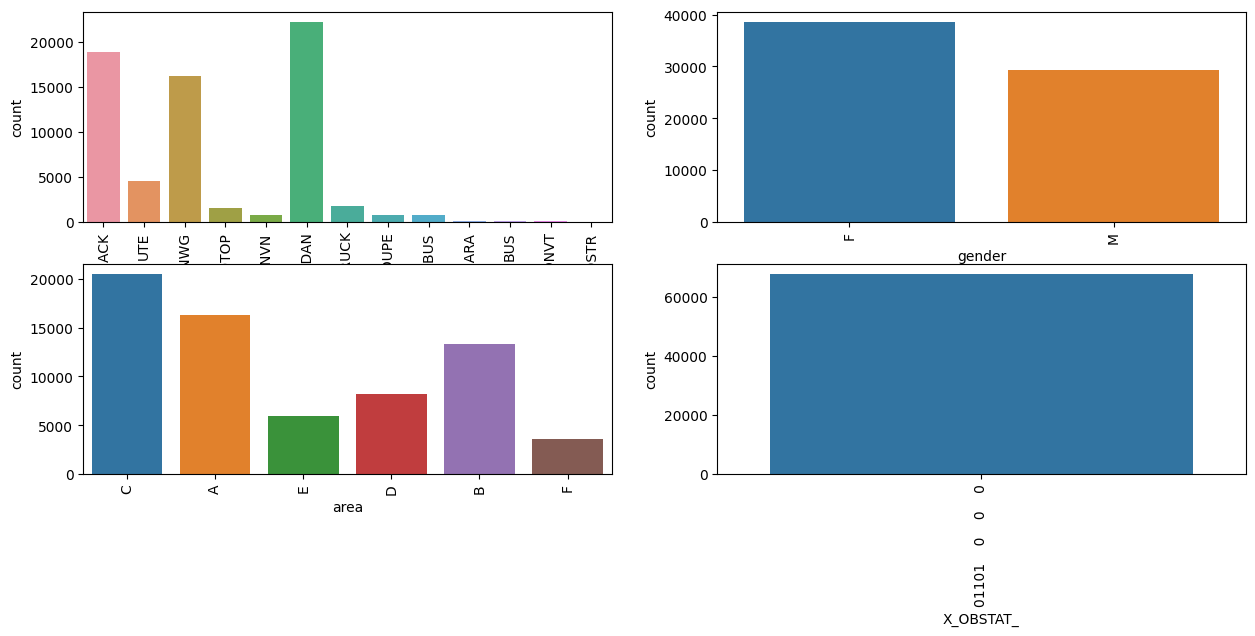

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df_freq[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

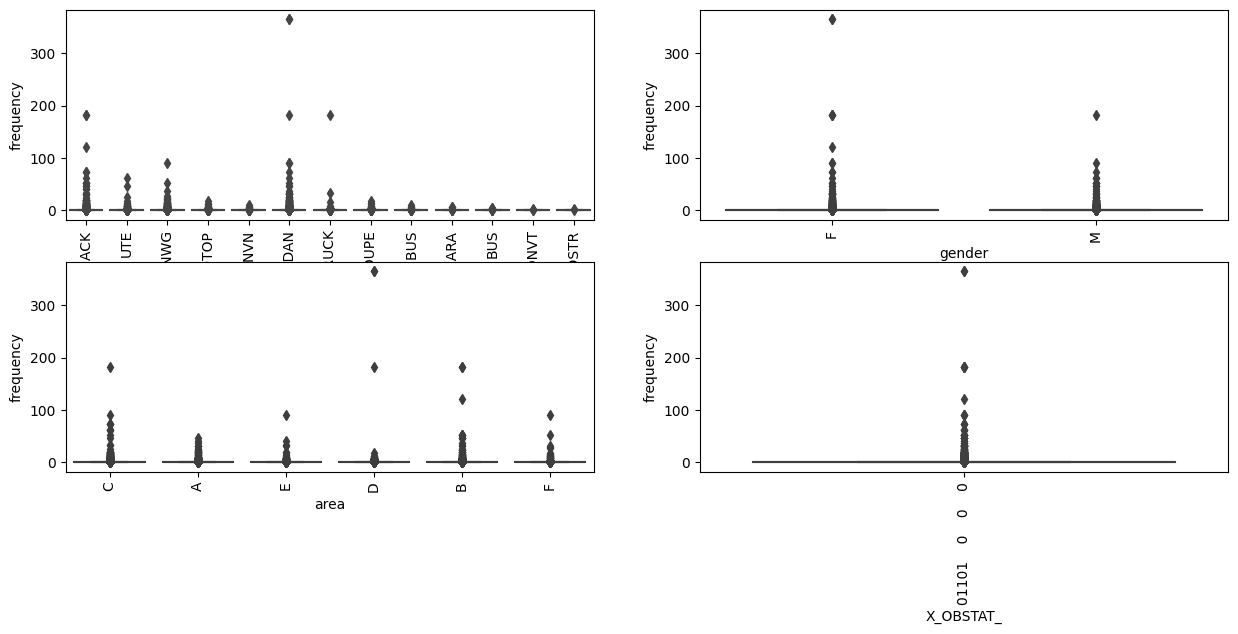

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=df_freq[variable],y=df_freq['frequency'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


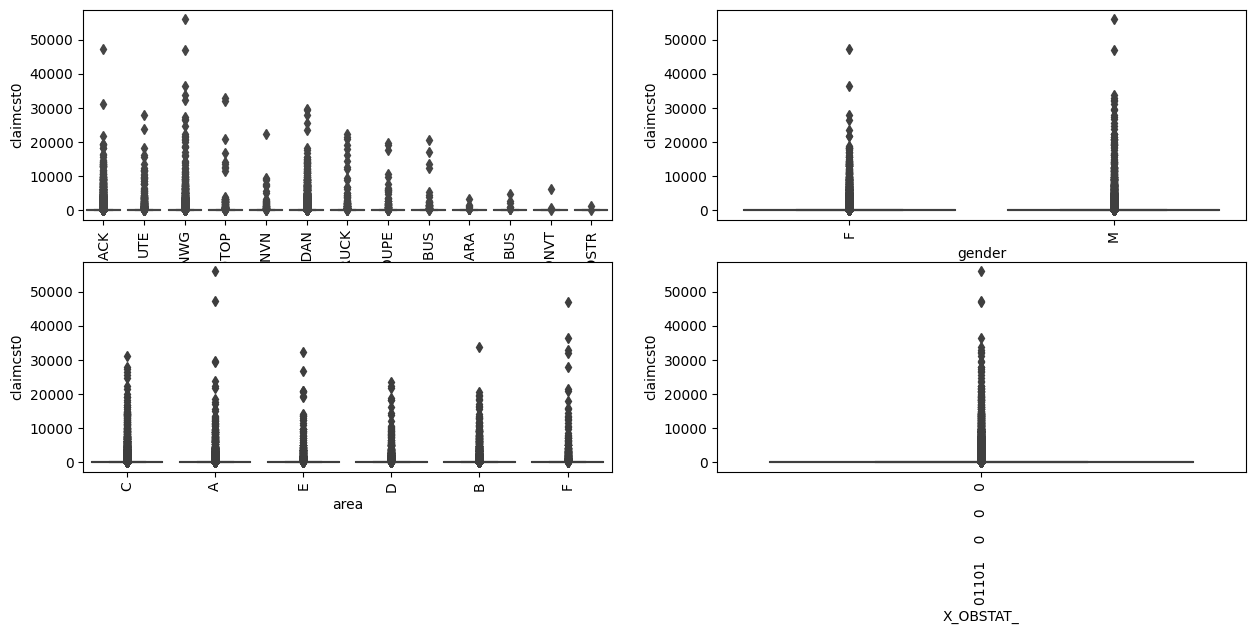

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=df_freq[variable],y=df_freq['claimcst0'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


## Non ML Estimates

In [13]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
 10  X_OBSTAT_  67856 non-null  object 
 11  frequency  67856 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 6.2+ MB


In [14]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import r2_score

#split data split to start
X_total=df_freq.drop(['clm','numclaims','frequency'],axis=1)
y_total=df_freq['claimcst0']
X_train,X_test,y_train,y_test =train_test_split(X_total, y_total, test_size=0.25, random_state=42)

In [15]:
def simple_est(df_train,df_test):
    est=df_train['claimcst0'].sum()/df_train['exposure'].sum()
    return df_test['exposure']*est

In [16]:
def category_est(df_train,df_test,category):
    '''
    Provides estimates for groups of categories of variables
    '''
    est=df_train[category+['exposure','claimcst0']].groupby(category).sum().reset_index()
    est['estimate']=est['claimcst0']/est['exposure']
    est.drop(['claimcst0','exposure'],axis=1,inplace=True)
    #df_test=df_test.merge(est,left_on=category,right_on=category)
    df_test=df_test.reset_index().merge(est,left_on=category,right_on=category,how="left").set_index(df_test.index)
    return df_test['estimate']*df_test['exposure']
    


In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_freq.select_dtypes(include=numerics).corr()

,veh_value,exposure,clm,numclaims,claimcst0,veh_age,agecat,frequency
veh_value,1.000000,-0.000588,0.018438,0.018004,0.009810,-0.543511,-0.055770,-0.004693
exposure,-0.000588,1.000000,0.132980,0.134393,0.036530,0.036962,0.025034,-0.033061
clm,0.018438,0.132980,1.000000,0.967107,0.480565,-0.012129,-0.030434,0.274981
numclaims,0.018004,0.134393,0.967107,1.000000,0.481762,-0.011572,-0.029572,0.268195
claimcst0,0.009810,0.036530,0.480565,0.481762,1.000000,-0.000012,-0.027430,0.246192
veh_age,-0.543511,0.036962,-0.012129,-0.011572,-0.000012,1.000000,0.017614,0.001280
agecat,-0.055770,0.025034,-0.030434,-0.029572,-0.027430,0.017614,1.000000,-0.013069
frequency,-0.004693,-0.033061,0.274981,0.268195,0.246192,0.001280,-0.013069,1.000000


In [18]:
df_out=X_test
df_out['simple_predicted']=simple_est(X_train,X_test)
df_out['actual']=y_test
print("Simple R2 ",r2_score(y_test,simple_est(X_train,X_test)))

category=['gender']
df_out['gender_predicted']=category_est(X_train,X_test,category)
print("Gender R2 ",r2_score(y_test,category_est(X_train,X_test,category)))

category=['agecat']
df_out['agecat_predicted']=category_est(X_train,X_test,category)
print("AgeCat R2 ",r2_score(y_test,category_est(X_train,X_test,category)))

category=['area']
df_out['area_predicted']=category_est(X_train,X_test,category)
print("AgeCat R2 ",r2_score(y_test,category_est(X_train,X_test,category)))





df_out.to_csv('df_out.csv')

Simple R2  -0.0008384493493325262
Gender R2  -0.0008891550037508633
AgeCat R2  -0.0007018794950963692
AgeCat R2  -0.0015411858645744125


In [19]:
def fit_model_with_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    model = CatBoostRegressor()
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)
    print(f"Average MSE: {avg_mse}")

    return model

## ML Estimates

In [20]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
 10  X_OBSTAT_  67856 non-null  object 
 11  frequency  67856 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 6.2+ MB


In [21]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import TweedieRegressor

X_freq=df_freq.drop(['frequency','clm','numclaims','claimcst0'],axis=1)
X_sev=df_freq[df_freq['claimcst0']>0].drop(['frequency','clm','numclaims','claimcst0'],axis=1)
y_freq=df_freq['frequency']
y_sev=df_freq[df_freq['claimcst0']>0]['claimcst0']
y_sev=df_freq['claimcst0']

X_train_freq,X_test_freq,y_train_freq,y_test_freq =train_test_split(X_freq, y_freq, test_size=0.33, random_state=42)
X_train_sev,X_test_sev,y_train_sev,y_test_sev =train_test_split(X_freq, y_sev, test_size=0.33, random_state=42)

In [22]:
#strip losses >100k
def cap_losses(x,threshold=100000):
    excess=sum([max(x,0) for x in y_train_sev-threshold])
    capped=pd.Series([min(x,threshold) for x in y_train_sev])
    return capped,excess

y_train_sev,train_excess=cap_losses(y_train_sev,threshold=10000)
y_test_sev,test_excess=cap_losses(y_test_sev,threshold=10000)


(array([4.4098e+04, 5.3100e+02, 2.5700e+02, 1.5800e+02, 9.6000e+01,
        5.7000e+01, 5.4000e+01, 4.4000e+01, 3.0000e+01, 1.3800e+02]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

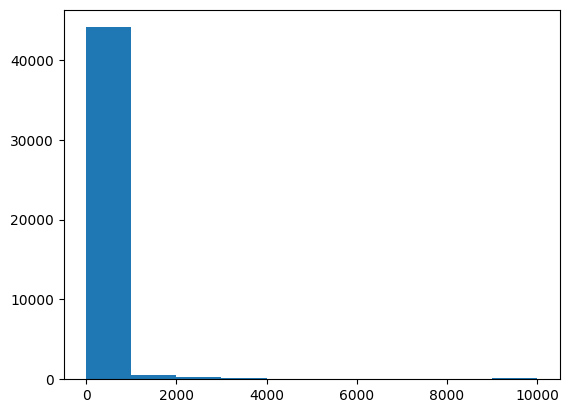

In [23]:
plt.hist(y_train_sev)

In [24]:
freq_model=CatBoostRegressor(max_depth=6,l2_leaf_reg=2)
freq_model.fit(X_train_freq,y_train_freq,cat_features=categorical,verbose=3)

0:	learn: 3.1962414	total: 223ms	remaining: 3m 42s
3:	learn: 3.1876907	total: 451ms	remaining: 1m 52s
6:	learn: 3.1761617	total: 638ms	remaining: 1m 30s
9:	learn: 3.1648866	total: 806ms	remaining: 1m 19s
12:	learn: 3.1413752	total: 1s	remaining: 1m 16s
15:	learn: 3.1221411	total: 1.18s	remaining: 1m 12s
18:	learn: 3.1124215	total: 1.37s	remaining: 1m 10s
21:	learn: 3.1055980	total: 1.56s	remaining: 1m 9s
24:	learn: 3.0970388	total: 1.79s	remaining: 1m 9s
27:	learn: 3.0946784	total: 1.99s	remaining: 1m 9s
30:	learn: 3.0907440	total: 2.2s	remaining: 1m 8s
33:	learn: 3.0817799	total: 2.4s	remaining: 1m 8s
36:	learn: 3.0637586	total: 2.58s	remaining: 1m 7s
39:	learn: 3.0625891	total: 2.79s	remaining: 1m 7s
42:	learn: 3.0434676	total: 3.03s	remaining: 1m 7s
45:	learn: 3.0357913	total: 3.28s	remaining: 1m 7s
48:	learn: 3.0238017	total: 3.47s	remaining: 1m 7s
51:	learn: 2.9982593	total: 3.66s	remaining: 1m 6s
54:	learn: 2.9860088	total: 3.84s	remaining: 1m 5s
57:	learn: 2.9613104	total: 4.01s

In [25]:
sev_model=CatBoostRegressor(max_depth=6,l2_leaf_reg=2)
sev_model.fit(X_train_sev,y_train_sev,cat_features=categorical,verbose=3)

0:	learn: 787.7368401	total: 52.8ms	remaining: 52.7s
3:	learn: 787.4019862	total: 211ms	remaining: 52.5s
6:	learn: 787.1453958	total: 375ms	remaining: 53.2s
9:	learn: 786.8541246	total: 542ms	remaining: 53.6s
12:	learn: 786.6294837	total: 701ms	remaining: 53.2s
15:	learn: 786.4675725	total: 816ms	remaining: 50.2s
18:	learn: 786.2901370	total: 950ms	remaining: 49.1s
21:	learn: 786.1159425	total: 1.08s	remaining: 48.2s
24:	learn: 785.9683835	total: 1.21s	remaining: 47.3s
27:	learn: 785.7656025	total: 1.35s	remaining: 47s
30:	learn: 785.5487694	total: 1.53s	remaining: 48s
33:	learn: 785.4600596	total: 1.66s	remaining: 47.2s
36:	learn: 785.2990696	total: 1.83s	remaining: 47.6s
39:	learn: 785.2126305	total: 1.95s	remaining: 46.9s
42:	learn: 785.0872730	total: 2.11s	remaining: 47s
45:	learn: 784.9773222	total: 2.23s	remaining: 46.3s
48:	learn: 784.8456789	total: 2.4s	remaining: 46.6s
51:	learn: 784.6927722	total: 2.57s	remaining: 46.9s
54:	learn: 784.6600504	total: 2.69s	remaining: 46.3s
57:

Train R2  0.39290053107315115


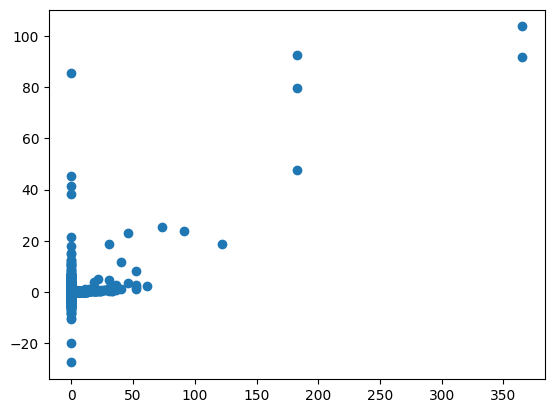

In [26]:
print('Train R2 ',r2_score(y_train_freq,freq_model.predict(X_train_freq)))
#print('Test R2',r2_score(model.predict(X_test_sev),y_test_sev))
plt.scatter(y_train_freq,freq_model.predict(X_train_freq))

Train R2  0.04591338235824338


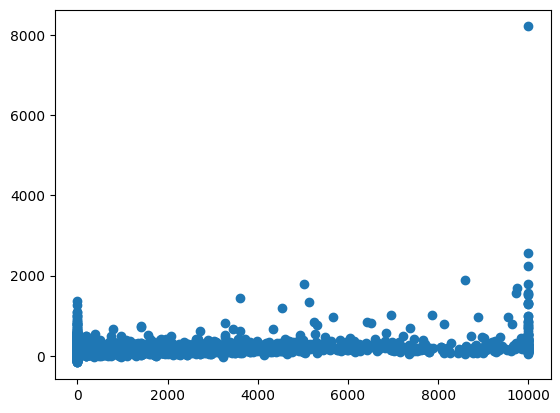

In [27]:
print('Train R2 ',r2_score(y_train_sev,sev_model.predict(X_train_sev)))
#print('Test R2',r2_score(model.predict(X_test_sev),y_test_sev))
plt.scatter(y_train_sev,sev_model.predict(X_train_sev))

In [28]:
sev_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,exposure,27.535771
1,veh_value,25.781528
2,area,13.307595
3,veh_body,11.833474
4,agecat,9.901318
5,veh_age,8.387164
6,gender,3.253151
7,X_OBSTAT_,0.000000


In [29]:
#final model
df_out=X_test_freq
df_out['freq']=freq_model.predict(X_test_freq)
df_out['sev']=sev_model.predict(X_test_freq)
df_out['total']=df_out['freq']*df_out['sev']
df_out['actual_freq']=y_test_freq
df_out['actual_sev']=df_freq.iloc[X_test_freq.index]['claimcst0']
df_out.to_csv('df_model_out.csv')

(array([2.4220e+03, 1.7949e+04, 1.8670e+03, 1.1800e+02, 2.2000e+01,
        7.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-139.74134509,   38.30101275,  216.3433706 ,  394.38572845,
         572.42808629,  750.47044414,  928.51280199, 1106.55515983,
        1284.59751768, 1462.63987553, 1640.68223337]),
 <BarContainer object of 10 artists>)

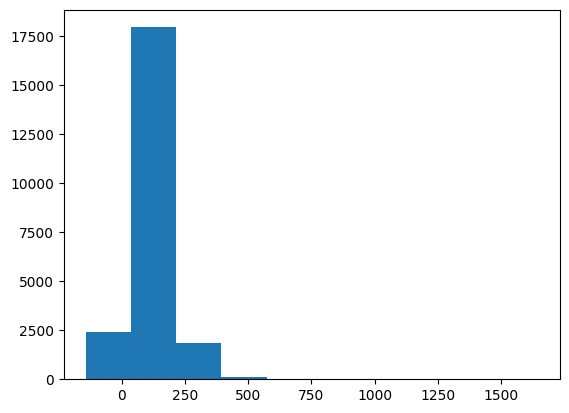

In [30]:
plt.hist(df_out['sev'])